In [3]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import geopandas
import pandas

import copy
from shapely.geometry import MultiLineString, LineString, MultiPoint
import numpy as np
import json
from pathlib import Path

import fiona

In [4]:
pnt = geopandas.read_file("Points/bus_stops.shp")
lpnt = geopandas.read_file("Lines/linepointstreet.shp")
ppnt = geopandas.read_file("Polygons/polypoints.shp")

In [5]:
pnt.head()

full_id      osm_id osm_type   highway           name shelter name_en  \
0   n729613537   729613537     node  bus_stop  Bus Stop 6910    None    None   
1  n1010238204  1010238204     node  bus_stop           5000     yes    None   
2  n1010239992  1010239992     node  bus_stop           None     yes    None   
3  n1010242406  1010242406     node  bus_stop           5516     yes    None   
4  n1010242745  1010242745     node  bus_stop           None     yes    None   

    ref                         geometry  
0  None  POINT (174.7787019 -41.2929918)  
1  None     POINT (174.78246 -41.293858)  
2  None  POINT (174.7849295 -41.2921881)  
3  None   POINT (174.7826853 -41.293737)  
4  None   POINT (174.7772012 -41.295185)

In [6]:
lpnt.head()

street                                      geometry
0  5181907  POINT (174.7803093057093 -41.29001958879277)
1  5181907  POINT (174.7801789919197 -41.29024777336626)
2  5181912  POINT (174.7698771456978 -41.29316914309541)
3  5181912  POINT (174.7705698361428 -41.29338751969565)
4  5181919  POINT (174.7787020359892 -41.29229139748418)

In [7]:
ppnt.head()

bound                                      geometry
0  26509771  POINT (174.7843606528178 -41.29294613444772)
1  26509771  POINT (174.7842179274404 -41.29287714400327)
2  26509771  POINT (174.7841846976851 -41.29278562101244)
3  26509771  POINT (174.7840554703083 -41.29278900468544)
4  26509771  POINT (174.7839417773234 -41.29272648852628)

In [10]:
allpnt = pandas.concat([ppnt, lpnt, pnt])

C:\Users\ollie\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [15]:
out=Path("D:\GISC425\Project\shapefiles (1)\Comb.shp") #CHANGE TO OWN DIRECTORY
allpnt.to_file(out)

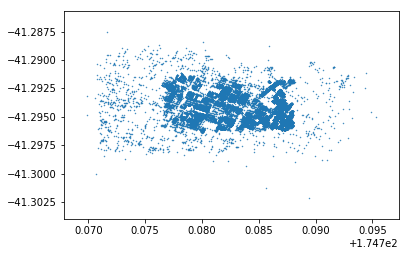

In [17]:
allpnt.plot(markersize=0.2)

In [18]:
comb=geopandas.read_file('Comb.shp')

In [19]:
comb['lon'] = comb['geometry'].x
comb['lat'] = comb['geometry'].y

In [20]:
array_comb = np.array([[comb['lon'][k], comb['lat'][k]] for k in range(len(comb))])

In [22]:
import scipy.spatial as spatial
vor = spatial.Voronoi(array_comb)

In [24]:
pip install pytess

  Running setup.py bdist_wheel for pytess: started
  Running setup.py bdist_wheel for pytess: finished with status 'done'
  Stored in directory: C:\Users\ollie\AppData\Local\pip\Cache\wheels\e6\a9\0c\deb8003b037eb99504cb256ea963c6880bafd36e4d0cce6ce0
Successfully built pytess
Note: you may need to restart the kernel to use updated packages.


In [25]:
import pytess

In [53]:
combpoly = pytess.voronoi(list(array_comb), buffer_percent=50)

In [48]:
import shapely
gs = geopandas.GeoSeries([shapely.geometry.Polygon(p[1]) for p in combpoly])

In [66]:
gsfull=geopandas.GeoSeries(combpoly)

In [69]:
gsfull = geopandas.GeoDataFrame(gsfull)

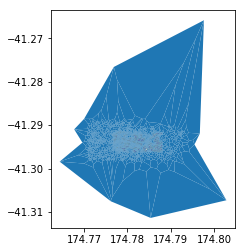

In [49]:
gs.plot()

In [70]:
gsfull.head()

0
0  (None, [(174.78535068641642, -41.3113892948233...
1  ([174.78559724117457, -41.301286762048406], [(...
2  ([174.7893863361941, -41.302124550434556], [(1...
3  ([174.783872072555, -41.2993722640889], [(174....
4  ([174.7823153669374, -41.298883902632944], [(1...

In [71]:
combvoro=geopandas.read_file('CombVoro.shp')

In [81]:
CVS = combvoro.dissolve(by='street', aggfunc='sum')

In [82]:
CVB = combvoro.dissolve(by='bound', aggfunc='sum')

TopologyException: Input geom 1 is invalid: Self-intersection at or near point 174.7854238718806 -41.295169028386873 at 174.7854238718806 -41.295169028386873
TopologyException: Input geom 1 is invalid: Self-intersection at or near point 174.7854238718806 -41.295169028386873 at 174.7854238718806 -41.295169028386873
TopologyException: Input geom 1 is invalid: Self-intersection at or near point 174.7854238718806 -41.295169028386873 at 174.7854238718806 -41.295169028386873


ValueError: No Shapely geometry can be created from null value